## 0. Install and Import Dependencies   

Get the training template here: https://github.com/nicknochnack/EasyOCR

Other Links Mentioned in the Video    
__PyTorch__ Install: https://pytorch.org/get-started/locally/   
__EasyOCR__ Documentation: https://github.com/JaidedAI/EasyOCR   
__OpenCV__ Documentation: https://opencv.org/   

CUDA : GPU support

In [2]:
!pip install torch torchvision torchaudio
!pip install easyocr
!pip install matplotlib

  Using cached torchvision-0.14.0-cp39-cp39-win_amd64.whl (1.1 MB)
  Using cached torchaudio-0.13.0-cp39-cp39-win_amd64.whl (2.1 MB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)


You should consider upgrading via the 'D:\Jupyter Virtual Env\OCR_experiment\Scripts\python.exe -m pip install --upgrade pip' command.


     ---------------------------------------- 2.9/2.9 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 35.0/35.0 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 40.2/40.2 MB 2.3 MB/s eta 0:00:00
     -------------------------------------- 293.9/293.9 KB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 12.1/12.1 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 2.4 MB/s eta 0:00:00
     -------------------------------------- 151.6/151.6 KB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 94.4/94.4 KB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 2.4 MB/s eta 0:00:00
     -------------------------------------- 210.3/210.3 KB 1.6 MB/s eta 0:00:00


You should consider upgrading via the 'D:\Jupyter Virtual Env\OCR_experiment\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

## 1. Read in images or video

In [27]:
IMAGE_PATH = 'images\surf.jpeg'

In [28]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


[([[18, 18], [293, 18], [293, 145], [18, 145]], 'SURF', 0.9862082004547119)]

## 2. Draw Results

In [29]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

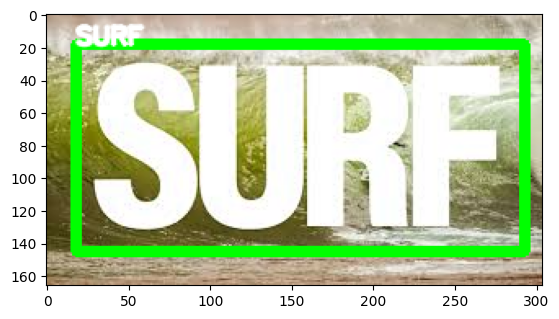

In [30]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
img = cv2.putText(img, text, top_left, font, .5, (255,255,255), 2, cv2.LINE_AA)
plt.imshow(img)
plt.show()

## 3. Handling Multiple Lines

In [33]:
IMAGE_PATH = 'images\sign.png'
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


[([[19, 181], [165, 181], [165, 201], [19, 201]],
  'HEAD PROTECTION',
  0.9778256296390029),
 ([[31, 201], [153, 201], [153, 219], [31, 219]],
  'MUST BE WORN',
  0.9719649866726915),
 ([[39, 219], [145, 219], [145, 237], [39, 237]],
  'ON THIS SITE',
  0.9683973478739152)]

In [42]:
result[0]

([[19, 181], [165, 181], [165, 201], [19, 201]],
 'HEAD PROTECTION',
 0.9778256296390029)

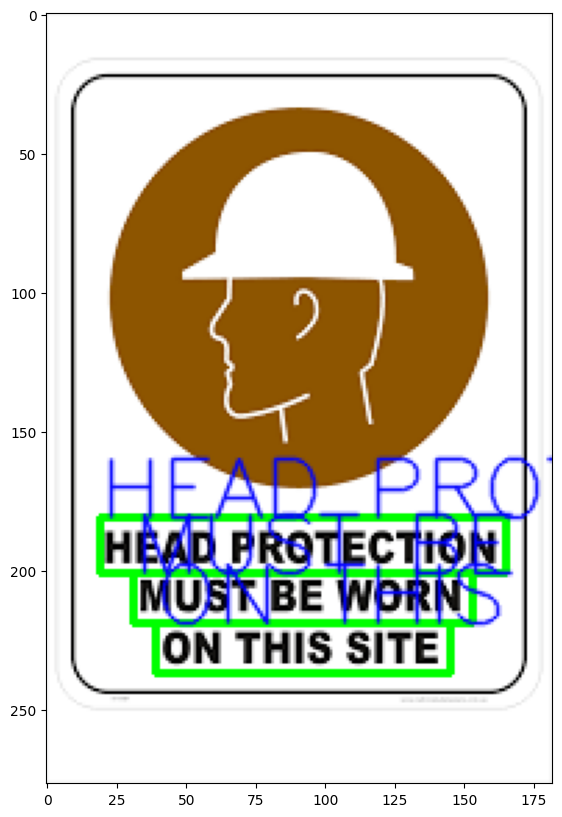

In [51]:
img = cv2.imread(IMAGE_PATH)
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 2)
    img = cv2.putText(img, text, top_left, font,8, (0,0,255), 1, cv2.LINE_AA)
    
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()